# Lab on sourcing Data


#### This is going to be an independent lab.
#### Every person is reponsible for their own submission and their own codebase. 
#### Collaboration is fine, but visualizations should be unique, and specific functions and methods should be your own work.

In [1]:
# You are going to select an API ENDPOINT.
# Your goal is to make a call to the API.
# You are going to then take the data returned and store it in a Database.
# You are going to take the raw data and make a new table from it that contains the data in a more workable format
# You are going to build out at least 3 helper functions that help you access data from your DB, or transforms your data into a specific format.
# Using your helper functions, create 2 visualizations that from the data you sourced.
# 2 Visualizations minimum.

### Insert your code below for accessing the API endpoint and getting the data.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import json
import selenium
from bs4 import BeautifulSoup


url = 'https://data.cdc.gov/resource/9mfq-cb36.json'
response = requests.request("GET", url)
response.json()[0]

{'submission_date': '2021-03-11T00:00:00.000',
 'state': 'KS',
 'tot_cases': '297229',
 'conf_cases': '241035.0',
 'prob_cases': '56194',
 'new_case': '0.0',
 'pnew_case': '0',
 'tot_death': '4851',
 'new_death': '0.0',
 'pnew_death': '0',
 'created_at': '2021-03-12T15:20:13.190',
 'consent_cases': 'Agree',
 'consent_deaths': 'N/A'}

In [3]:
df = pd.DataFrame(response.json())
df.fillna(value='N/A', inplace=True)
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death
0,2021-03-11T00:00:00.000,KS,297229,241035.0,56194,0.0,0,4851,0.0,0,2021-03-12T15:20:13.190,Agree,N/A,N/A,N/A
1,2021-02-12T00:00:00.000,UT,359641,359641.0,0,1060.0,0,1785,11.0,2,2021-02-13T14:50:08.565,Agree,Agree,1729.0,56
2,2020-02-04T00:00:00.000,AR,0,N/A,N/A,0.0,N/A,0,0.0,N/A,2020-03-26T16:22:39.452,Not agree,Not agree,N/A,N/A
3,2021-12-06T00:00:00.000,MP,1104,1104.0,0,0.0,0,5,2.0,0,2021-12-08T00:00:00.000,Agree,Agree,5.0,0
4,2020-07-17T00:00:00.000,MP,37,37.0,0,1.0,0,2,0.0,0,2020-07-19T00:00:00.000,Agree,Agree,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-02-17T00:00:00.000,MP,135,135.0,0,1.0,0,2,0.0,0,2021-02-19T00:00:00.000,Agree,Agree,2.0,0
996,2021-05-06T00:00:00.000,OK,450344,355325.0,95019,207.0,41,7269,1.0,0,2021-05-07T00:00:00.000,Agree,Agree,6189.0,1080
997,2020-09-03T00:00:00.000,MP,57,57.0,0,0.0,0,2,0.0,0,2020-09-05T00:00:00.000,Agree,Agree,2.0,0
998,2020-12-18T00:00:00.000,AK,42334,N/A,N/A,487.0,0,266,1.0,0,2020-12-18T00:00:00.000,N/A,N/A,N/A,N/A


In [4]:
lst = [df.loc[i].to_json() for i in df.index]
lst

['{"submission_date":"2021-03-11T00:00:00.000","state":"KS","tot_cases":"297229","conf_cases":"241035.0","prob_cases":"56194","new_case":"0.0","pnew_case":"0","tot_death":"4851","new_death":"0.0","pnew_death":"0","created_at":"2021-03-12T15:20:13.190","consent_cases":"Agree","consent_deaths":"N\\/A","conf_death":"N\\/A","prob_death":"N\\/A"}',
 '{"submission_date":"2021-02-12T00:00:00.000","state":"UT","tot_cases":"359641","conf_cases":"359641.0","prob_cases":"0","new_case":"1060.0","pnew_case":"0","tot_death":"1785","new_death":"11.0","pnew_death":"2","created_at":"2021-02-13T14:50:08.565","consent_cases":"Agree","consent_deaths":"Agree","conf_death":"1729.0","prob_death":"56"}',
 '{"submission_date":"2020-02-04T00:00:00.000","state":"AR","tot_cases":"0","conf_cases":"N\\/A","prob_cases":"N\\/A","new_case":"0.0","pnew_case":"N\\/A","tot_death":"0","new_death":"0.0","pnew_death":"N\\/A","created_at":"2020-03-26T16:22:39.452","consent_cases":"Not agree","consent_deaths":"Not agree","con

### Insert your code below that stores the raw data that you pulled into a database.


In [ ]:
connector = sqlite3.connect('COVID19.db') # Run this cell once
covid19_table = df.to_sql("COVID19_CASES", connector)
connector.close()

### Insert your code below that takes the raw data and transforms it into a more useable format.

In [ ]:
connector = sqlite3.connect('COVID19.db') # Run cell once
cursor = connector.cursor()

create_table = '''CREATE TABLE CASES(
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    SUBMISSION_DATE TEXT,
    STATE TEXT,
    TOT_CASES TEXT,
    CONF_CASES TEXT,
    PROB_CASES TEXT,
    NEW_CASE TEXT,
    PNEW_CASE TEXT,
    TOT_DEATH TEXT,
    NEW_DEATH TEXT,
    PNEW_DEATH TEXT,
    CREATED_AT TEXT,
    CONSENT_CASES TEXT,
    CONSENT_DEATH TEXT,
    CONF_DEATH TEXT,
    PROB_DEATH TEXT
)'''

cursor.execute(create_table)
connector.commit()
connector.close()

In [5]:
def extractor(data):
    return [tuple(x for x in row.values()) for row in data]

In [6]:
connector = sqlite3.connect('COVID19.db')
cursor = connector.cursor()
data = [json.loads(i) for i in lst]
hold = extractor(data)

In [ ]:
# Run cell once
cursor.executemany('INSERT INTO CASES (submission_date, state, tot_cases, conf_cases, prob_cases, new_case, pnew_case, tot_death, new_death, pnew_death, created_at, consent_cases, consent_death, conf_death, prob_death) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)', hold)
connector.commit()
connector.close()

### Insert your code below that contains your three helper functions for accessing and working with your database.

In [7]:
def select_state(state):
    connector = sqlite3.connect('COVID19.db')
    cursor = connector.cursor()
    values = [i for i in cursor.execute('SELECT * FROM CASES WHERE STATE=:a', {'a' : state})]
    return values
x = select_state('CA')
x

[(104,
  '2021-06-07T00:00:00.000',
  'CA',
  '3690868',
  '3690868.0',
  '0',
  '874.0',
  '0',
  '62473',
  '3.0',
  '0',
  '2021-06-09T00:00:00.000',
  'Agree',
  'Agree',
  '62473.0',
  '0'),
 (211,
  '2021-10-28T00:00:00.000',
  'CA',
  '4885289',
  '4640489.0',
  '244800',
  '8770.0',
  '3821',
  '71408',
  '113.0',
  '0',
  '2021-10-30T00:00:00.000',
  'Agree',
  'Agree',
  '71408.0',
  '0'),
 (214,
  '2020-02-27T00:00:00.000',
  'CA',
  '33',
  '33.0',
  '0',
  '2.0',
  '0',
  '0',
  '0.0',
  '0',
  '2020-02-29T00:00:00.000',
  'Agree',
  'Agree',
  '0.0',
  '0'),
 (217,
  '2020-08-12T00:00:00.000',
  'CA',
  '586056',
  '586056.0',
  '0',
  '11645.0',
  '0',
  '10491',
  '219.0',
  '0',
  '2020-08-14T00:00:00.000',
  'Agree',
  'Agree',
  '10491.0',
  '0'),
 (286,
  '2021-11-25T00:00:00.000',
  'CA',
  '5041193',
  '4785062.0',
  '256131',
  '4195.0',
  '0',
  '73365',
  '0.0',
  '0',
  '2021-11-26T14:12:52.035',
  'Agree',
  'Not agree',
  'N/A',
  'N/A'),
 (301,
  '2021-06-1

In [8]:
def select_year(year):
    connector = sqlite3.connect('COVID19.db')
    cursor = connector.cursor()
    values = [i for i in cursor.execute('SELECT * FROM CASES WHERE SUBSTRING(SUBMISSION_DATE, 1, 4) =:a', {'a' : str(year)})]
    return values
y = select_year(2020)
y

[(2,
  '2020-08-17T00:00:00.000',
  'MD',
  '100715',
  'N/A',
  'N/A',
  '503.0',
  '0',
  '3765',
  '3.0',
  '0',
  '2020-08-19T00:00:00.000',
  'N/A',
  'Agree',
  '3616.0',
  '149'),
 (4,
  '2020-05-13T00:00:00.000',
  'VT',
  '855',
  'N/A',
  'N/A',
  '2.0',
  '0',
  '52',
  '0.0',
  '0',
  '2020-05-15T00:00:00.000',
  'Not agree',
  'Not agree',
  'N/A',
  'N/A'),
 (7,
  '2020-04-28T00:00:00.000',
  'MI',
  '51401',
  '48887.0',
  '2514',
  '1218.0',
  '96',
  '4310',
  '105.0',
  '10',
  '2020-04-29T00:00:00.000',
  'Agree',
  'Agree',
  '4065.0',
  '245'),
 (8,
  '2020-05-03T00:00:00.000',
  'NH',
  '2518',
  'N/A',
  'N/A',
  '89.0',
  '0',
  '86',
  '2.0',
  '0',
  '2020-05-04T22:49:24.344',
  'Not agree',
  'Not agree',
  'N/A',
  'N/A'),
 (11,
  '2020-07-31T00:00:00.000',
  'ND',
  '6602',
  '6602.0',
  '0',
  '133.0',
  '0',
  '103',
  '0.0',
  '0',
  '2020-08-01T14:38:12.337',
  'Agree',
  'Not agree',
  'N/A',
  'N/A'),
 (12,
  '2020-08-11T00:00:00.000',
  'GU',
  '449'

In [9]:
def select_pnew_death(value, lesser=False):
    connector = sqlite3.connect('COVID19.db')
    cursor = connector.cursor()
    if lesser: return [i for i in cursor.execute('SELECT * FROM CASES WHERE PNEW_DEATH <=:a', {'a' : str(value)})]
    return [i for i in cursor.execute('SELECT * FROM CASES WHERE PNEW_DEATH >=:a', {'a' : str(value)})]
z = select_pnew_death(1, True)
z

[(1,
  '2021-12-01T00:00:00.000',
  'ND',
  '163565',
  '135705.0',
  '27860',
  '589.0',
  '220',
  '1907',
  '9.0',
  '0',
  '2021-12-02T14:35:20.922',
  'Agree',
  'Not agree',
  'N/A',
  'N/A'),
 (2,
  '2020-08-17T00:00:00.000',
  'MD',
  '100715',
  'N/A',
  'N/A',
  '503.0',
  '0',
  '3765',
  '3.0',
  '0',
  '2020-08-19T00:00:00.000',
  'N/A',
  'Agree',
  '3616.0',
  '149'),
 (3,
  '2021-07-20T00:00:00.000',
  'MD',
  '464491',
  'N/A',
  'N/A',
  '155.0',
  '0',
  '9822',
  '3.0',
  '1',
  '2021-07-22T00:00:00.000',
  'N/A',
  'Agree',
  '9604.0',
  '218'),
 (4,
  '2020-05-13T00:00:00.000',
  'VT',
  '855',
  'N/A',
  'N/A',
  '2.0',
  '0',
  '52',
  '0.0',
  '0',
  '2020-05-15T00:00:00.000',
  'Not agree',
  'Not agree',
  'N/A',
  'N/A'),
 (5,
  '2021-10-06T00:00:00.000',
  'DE',
  '134690',
  '124148.0',
  '10542',
  '444.0',
  '45',
  '1977',
  '2.0',
  '0',
  '2021-10-08T00:00:00.000',
  'Agree',
  'Agree',
  '1810.0',
  '167'),
 (8,
  '2020-05-03T00:00:00.000',
  'NH',
 

### Insert your code below that takes the data you sourced, and creates 2 visualizations from that data.

In [26]:
df = df.replace('N/A', np.NaN)
int_col = ['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'tot_death', 'new_death', 'pnew_death', 'conf_death', 'prob_death']
for i in int_col:
    df[i] = pd.to_numeric(df[i])
df.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case           float64
pnew_case          float64
tot_death            int64
new_death          float64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
conf_death         float64
prob_death         float64
dtype: object

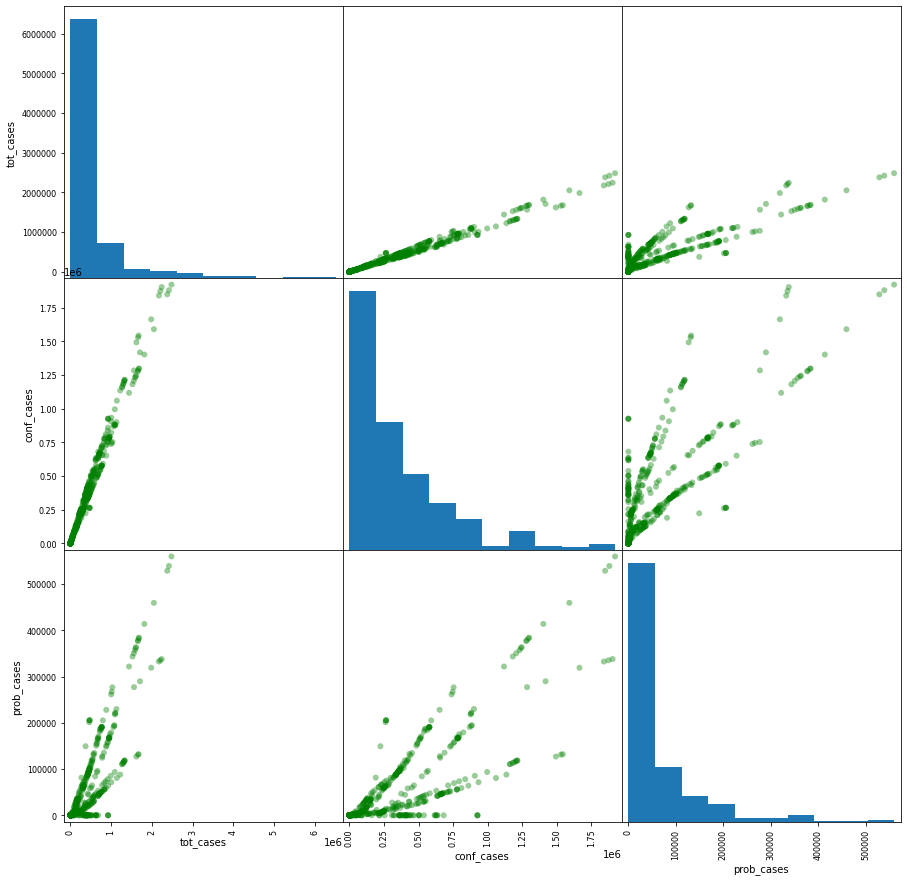

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:, :5], figsize=(15, 15), alpha=0.4, marker='o', color='g')
plt.show()